#### Architecture - Semantic Search using Elastic Search


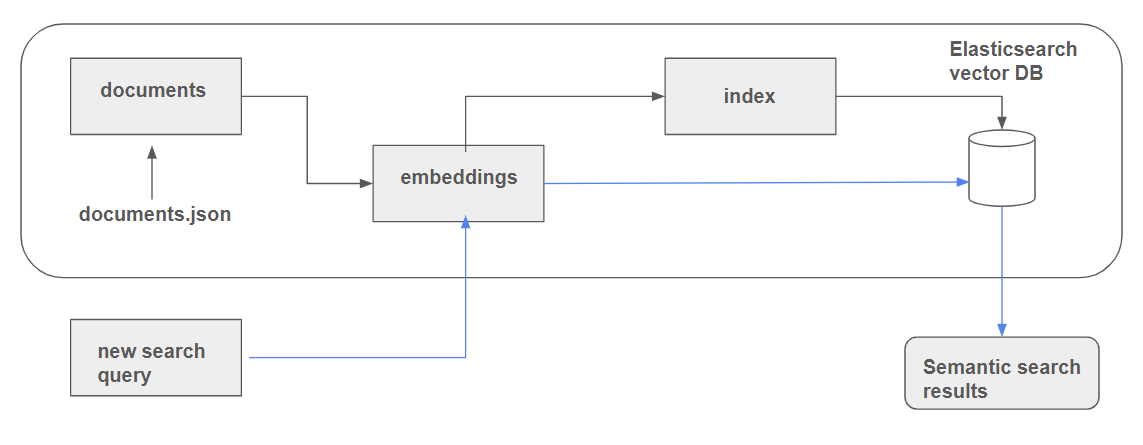

* Two very important concepts in Elasticsearch are documents and indexes.

* A document is collection of fields with their associated values. 

* To work with Elasticsearch you have to organize your data into documents, and then add all your documents to an index. 

* Index as a collection of documents that is stored in a highly optimized format designed to perform efficient searches.

#### Step 1: Prepare documents

In [1]:
import json

with open('documents.json', 'rt') as f_in:
    docs_raw = json.load(f_in)

In [3]:
documents = []

for course_dict in docs_raw:
    for doc in course_dict['documents']:
        doc['course'] = course_dict['course']
        documents.append(doc)

documents[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp'}

#### Step 2: Create Embeddings using Pretrained Models

Sentence Transformers documentation here: https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

In [6]:
!pip install sentence-transformers==2.7.0


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [11]:
# This is a new library compared to the previous modules. 
# Please perform "pip install sentence_transformers==2.7.0"
from sentence_transformers import SentenceTransformer

# if you get an error do the following:
# 1. Uninstall numpy 
# 2. Uninstall torch
# 3. pip install numpy==1.26.4
# 4. pip install torch
# run the above cell, it should work
model = SentenceTransformer("multi-qa-distilbert-cos-v1")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.52k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/523 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
user_question = "I just discovered the course. Can I still join it?"

model.encode(user_question)

array([ 7.82226175e-02, -4.01311480e-02,  3.86136174e-02, -1.78979419e-04,
        8.92346054e-02, -5.04591353e-02, -1.05027072e-02,  3.71056125e-02,
       -4.18713838e-02,  3.48085277e-02, -1.20701995e-02, -2.36942172e-02,
        3.87899689e-02,  1.60988104e-02,  3.50747332e-02,  3.04757687e-03,
        5.79672195e-02, -4.10627648e-02, -3.41552906e-02, -2.56396793e-02,
       -3.55264321e-02,  1.42908283e-02, -1.62800662e-02,  3.21446136e-02,
       -4.66897637e-02,  7.89186060e-02,  4.90160808e-02,  1.56760961e-02,
       -1.69110000e-02,  2.26482209e-02,  5.60205802e-02, -3.98361497e-02,
        6.77409470e-02, -1.20210163e-02,  1.12619717e-03, -1.94394737e-02,
       -2.65951362e-02,  1.06178075e-02,  1.69687793e-02,  1.13488315e-02,
       -2.97062900e-02,  5.25258556e-02, -1.41453119e-02,  4.61699925e-02,
        1.17066409e-02, -2.38052960e-02, -6.32557943e-02, -1.92041676e-02,
       -7.10593350e-03,  3.24167535e-02,  2.49618571e-02, -5.27498079e-03,
        2.01149583e-02, -

In [16]:
import requests

base_url = 'https://github.com/DataTalksClub/llm-zoomcamp/blob/main'
relative_url = '03-vector-search/eval/documents-with-ids.json'
docs_url = f'{base_url}/{relative_url}?raw=1'
docs_response = requests.get(docs_url)
documents = docs_response.json()


In [25]:
documents[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp',
 'id': '1f6520ca',
 'text_vector': [0.03854314237833023,
  0.04456097260117531,
  0.020321249961853027,
  0.07622136175632477,
  0.05623682588338852,
  -0.012406776659190655,
  -0.005392157938331366,
  0.033126045018434525,
  0.004516647197306156,
  0.0016236326191574335,
  -0.02444063127040863,
  0.007054594345390797,
  0.028258314356207848,
  -0.010461532510817051,
  0.006112263537943363,
  0.009858728386461735,
  0.018056595697999,
  -0.022460389882326126,
  -0.014579554088413715,
  0.020842470228672028,
  0.04786958545446396,
  -0.028132470324635506,
  0.015219469554722309,
  0.04718557745218277,
  -0.01814337819814682,
  0.013302010484039783,
  0.05478339642286301,
  0.04040863737463951,
  0.025459978729486465,
  -0.05038437619805336,
  0.00878971256315

In [38]:
embeddings = []
for doc in documents:
    qa_text = f'{doc['question']} {doc['text']}'
    embeddings.append(model.encode(qa_text).tolist())


In [22]:
#created the dense vector using the pre-trained model
operations = []
for doc in documents:
    # Transforming the title into an embedding using the model
    doc["text_vector"] = model.encode(doc["text"]).tolist()
    operations.append(doc)

In [39]:
import numpy as np
X = np.array(embeddings)
X.shape

(948, 768)

In [44]:
v = model.encode(user_question)
scores = X.dot(v)
scores.sort()
scores[-1]

0.6506575038484061

In [47]:
class VectorSearchEngine():
    def __init__(self, documents, embeddings):
        self.documents = documents
        self.embeddings = embeddings

    def search(self, v_query, num_results=10):
        scores = self.embeddings.dot(v_query)
        idx = np.argsort(-scores)[:num_results]
        return [self.documents[i] for i in idx]

search_engine = VectorSearchEngine(documents=documents, embeddings=X)
search_engine.search(v, num_results=5)


[{'text': 'Yes, you can. You won’t be able to submit some of the homeworks, but you can still take part in the course.\nIn order to get a certificate, you need to submit 2 out of 3 course projects and review 3 peers’ Projects by the deadline. It means that if you join the course at the end of November and manage to work on two projects, you will still be eligible for a certificate.',
  'section': 'General course-related questions',
  'question': 'The course has already started. Can I still join it?',
  'course': 'machine-learning-zoomcamp',
  'id': 'ee58a693',
  'text_vector': [0.0951107069849968,
   -0.04694203659892082,
   -0.006974636111408472,
   -0.007008429151028395,
   0.05774158984422684,
   -0.04652149975299835,
   0.00552561366930604,
   0.01356100756675005,
   0.00738006504252553,
   -0.005248896311968565,
   -0.04102335125207901,
   -0.008562013506889343,
   0.07881508767604828,
   0.02104146033525467,
   0.06581444293260574,
   -0.05610004812479019,
   0.02565482258796692,

In [48]:
import pandas as pd

base_url = 'https://github.com/DataTalksClub/llm-zoomcamp/blob/main'
relative_url = '03-vector-search/eval/ground-truth-data.csv'
ground_truth_url = f'{base_url}/{relative_url}?raw=1'

df_ground_truth = pd.read_csv(ground_truth_url)
df_ground_truth = df_ground_truth[df_ground_truth.course == 'machine-learning-zoomcamp']
ground_truth = df_ground_truth.to_dict(orient='records')

In [58]:
def hit_rate(relevance_total):
    cnt = 0

    for line in relevance_total:
        if True in line:
            cnt = cnt + 1

    return cnt / len(relevance_total)

relevance_total = []
search_engine = VectorSearchEngine(documents=ground_truth, embeddings=X)

for q in ground_truth:
    doc_id = q['document']
    results = search_engine.search(v, num_results=5)
    relevance = [d['document'] == doc_id for d in results]
    relevance_total.append(relevance)
hit_rate(relevance_total)

0.01092896174863388

#### Step 3: Setup ElasticSearch connection 

In [59]:
import os
from dotenv import load_dotenv
from elasticsearch import Elasticsearch

load_dotenv()
es_client = Elasticsearch('http://localhost:9200', basic_auth=("elastic", os.getenv("ELASTIC_PASSWORD"))) 

es_client.info()

ObjectApiResponse({'name': '7a16877d06db', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'YVGYdYhsThGPbt6O4VpQpg', 'version': {'number': '8.4.3', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73', 'build_date': '2022-10-04T07:17:24.662462378Z', 'build_snapshot': False, 'lucene_version': '9.3.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

#### Step 4: Create Mappings and Index

* Mapping is the process of defining how a document, and the fields it contains, are stored and indexed.

* Each document is a collection of fields, which each have their own data type.

* We can compare mapping to a database schema in how it describes the fields and properties that documents hold, the datatype of each field (e.g., string, integer, or date), and how those fields should be indexed and stored 



In [60]:
index_settings = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "text": {"type": "text"},
            "section": {"type": "text"},
            "question": {"type": "text"},
            "course": {"type": "keyword"} ,
            "text_vector": {"type": "dense_vector", "dims": 768, "index": True, "similarity": "cosine"},
        }
    }
}

In [61]:
index_name = "course-questions"

es_client.indices.delete(index=index_name, ignore_unavailable=True)
es_client.indices.create(index=index_name, body=index_settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'course-questions'})

#### Step 5: Add documents into index

In [62]:
for doc in operations:
    try:
        es_client.index(index=index_name, document=doc)
    except Exception as e:
        print(e)

In [ ]:
from tqdm.auto import tqdm

#### Step 6: Create end user query

In [63]:
search_term = "windows or mac?"
vector_search_term = model.encode(search_term)

In [64]:
query = {
    "field": "text_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000, 
}

In [65]:
res = es_client.search(index=index_name, knn=query, source=["text", "section", "question", "course"])
res["hits"]["hits"]

[{'_index': 'course-questions',
  '_id': 'vhpfx5ABnQzzkW0aSNFI',
  '_score': 0.6895529,
  '_source': {'question': 'Environment - Is the course [Windows/mac/Linux/...] friendly?',
   'course': 'data-engineering-zoomcamp',
   'section': 'General course-related questions',
   'text': 'Yes! Linux is ideal but technically it should not matter. Students last year used all 3 OSes successfully'}},
 {'_index': 'course-questions',
  '_id': 'rxpfx5ABnQzzkW0aR9Hp',
  '_score': 0.6628037,
  '_source': {'question': 'Environment - Should I use my local machine, GCP, or GitHub Codespaces for my environment?',
   'course': 'data-engineering-zoomcamp',
   'section': 'General course-related questions',
   'text': 'You can set it up on your laptop or PC if you prefer to work locally from your laptop or PC.\nYou might face some challenges, especially for Windows users. If you face cnd2\nIf you prefer to work on the local machine, you may start with the week 1 Introduction to Docker and follow through.\nHow

In [72]:
from tqdm.auto import tqdm
relevance_total = []

for q in tqdm(ground_truth):
    doc_id = q['document']
    relevance = [d['_id'] == doc_id for d in res["hits"]["hits"]]
    relevance_total.append(relevance)

hit_rate(relevance_total)

  0%|          | 0/1830 [00:00<?, ?it/s]

0.0

#### Step 7: Perform Keyword search with Semantic Search (Hybrid/Advanced Search)

In [ ]:
# Note: I made a minor modification to the query shown in the notebook here
# (compare to the one shown in the video)
# Included "knn" in the search query (to perform a semantic search) along with the filter  
knn_query = {
    "field": "text_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000
}

In [ ]:
response = es_client.search(
    index=index_name,
    query={
        "match": {"section": "General course-related questions"},
    },
    knn=knn_query,
    size=5
)

In [ ]:
response["hits"]["hits"]

#### References

1. https://logz.io/blog/elasticsearch-mapping/#:~:text=Within%20a%20search%20engine%2C%20mapping,indexes%20and%20stores%20its%20fields

2. https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

3. https://www.elastic.co/search-labs/tutorials

4. https://www.elastic.co/search-labs/blog/text-similarity-search-with-vectors-in-elasticsearch